In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [50]:
from mpl_toolkits.basemap import Basemap as Basemap

In [33]:
#create nodes
G = nx.DiGraph()
with open("Nodes.txt") as f:
    for line in f:   
        G.add_node(line.rstrip()) 

In [3]:
len(list(G.nodes))

6072

In [4]:
d_attributes_Latitude = {}
with open("Latitude.txt") as f:
    lst = 0
    for line in f:   
        d_attributes_Latitude[lst] = line.rstrip()
        lst=lst+1
nx.set_node_attributes(G,values=d_attributes_Latitude, name='Latitude')

d_attributes_Longitude = {}
with open("Longitude.txt") as f:
    lst = 0
    for line in f:   
        d_attributes_Longitude[lst] = line.rstrip()
        lst=lst+1
nx.set_node_attributes(G,values=d_attributes_Longitude, name='Longitude')


In [6]:
#create graph derectly from 'routes' because we have much less nodes than expected and it contains some typo in the attributes
G_a = nx.DiGraph()
with open('Source.txt') as f_s:
    lines_s = f_s.readlines()    
with open('Destination.txt') as f_d:
    lines_d = f_d.readlines()

In [7]:
source_list=[]
destination_list=[]
for i in range(0,len(lines_s)-1):
    G_a.add_edge(lines_s[i].rstrip(), lines_d[i].rstrip())
    source_list.append(lines_s[i].rstrip())
    destination_list.append(lines_d[i].rstrip())

#### Add weight to the edges

In [8]:
# info
print(nx.info(G_a))
#print(G_a.edges.data())

DiGraph with 3425 nodes and 37595 edges


C:\Users\dsarm\AppData\Local\Temp\ipykernel_32552\3754153929.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_a))


In [9]:
# create edge attribute weight with default None
nx.set_edge_attributes(G_a, values=None, name = 'weight')

In [10]:
#count the occurance of the airport in the routes database
sources, sources_counts=np.unique(source_list, return_counts=True)
des, des_counts=np.unique(destination_list, return_counts=True)

In [11]:
# create edge attribute source_occurrence with default None
nx.set_node_attributes(G_a, values=0, name = 'so')
for node in list(sources):
    G_a.nodes[node]['so'] = list(sources_counts)[list(sources).index(node)]

In [12]:
# create edge attribute destination_occurrence with default None
nx.set_node_attributes(G_a, values=0, name = 'do')
for node in list(des):
    G_a.nodes[node]['do'] = list(des_counts)[list(des).index(node)]

In [13]:
def add_weight_to_edges(graph):
    for node in graph.nodes:
        neighbors = [n for n in G_a.neighbors(node)]
        for nb in neighbors:
            graph[node][nb]['weight'] = np.mean([graph.nodes[node]['so'],G_a.nodes[node]['do'],graph.nodes[nb]['so'],graph.nodes[nb]['do']])
add_weight_to_edges(G_a)

In [14]:
G_a.edges(data=True)

OutEdgeDataView([('AAE', 'ALG', {'weight': 48.5}), ('AAE', 'CDG', {'weight': 264.75}), ('AAE', 'IST', {'weight': 184.25}), ('AAE', 'LYS', {'weight': 73.25}), ('AAE', 'MRS', {'weight': 70.75}), ('AAE', 'ORN', {'weight': 21.5}), ('AAE', 'ORY', {'weight': 105.5}), ('ALG', 'CGN', {'weight': 110.25}), ('ALG', 'CDG', {'weight': 304.25}), ('ALG', 'MRS', {'weight': 110.25}), ('ALG', 'AAE', {'weight': 48.5}), ('ALG', 'ABJ', {'weight': 69.5}), ('ALG', 'ALC', {'weight': 122.5}), ('ALG', 'AMM', {'weight': 99.75}), ('ALG', 'AZR', {'weight': 46.75}), ('ALG', 'BCN', {'weight': 239.75}), ('ALG', 'BEY', {'weight': 77.25}), ('ALG', 'BJA', {'weight': 47.0}), ('ALG', 'BKO', {'weight': 57.75}), ('ALG', 'BLJ', {'weight': 46.0}), ('ALG', 'BOD', {'weight': 77.5}), ('ALG', 'BRU', {'weight': 201.75}), ('ALG', 'BSK', {'weight': 46.0}), ('ALG', 'CAI', {'weight': 119.75}), ('ALG', 'CMN', {'weight': 106.5}), ('ALG', 'CZL', {'weight': 52.0}), ('ALG', 'DJG', {'weight': 44.75}), ('ALG', 'DKR', {'weight': 77.5}), ('ALG

In [15]:
pos = nx.spring_layout(G_a)

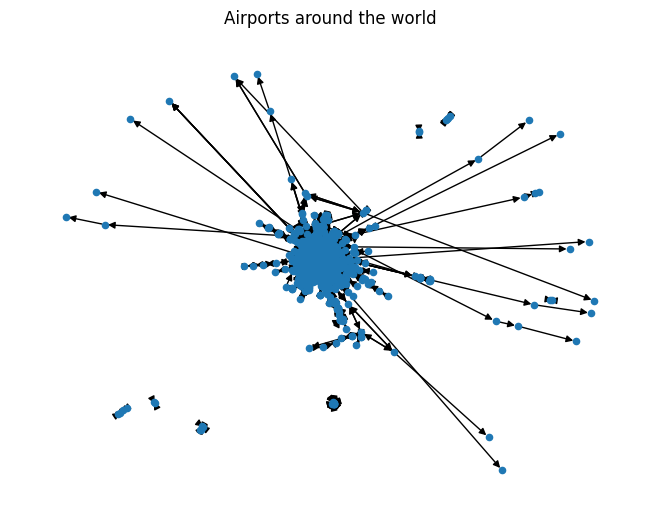

In [51]:
nx.draw(G_a, pos, node_size=20)
plt.title("Airports around the world")
plt.show()

In [17]:
degree = nx.degree_centrality(G_a)
degree = [degree[i] for i in G_a.nodes()]

In [18]:
closeness = nx.closeness_centrality(G_a)
closeness = [closeness[i] for i in G_a.nodes()]

In [19]:
betweenness = nx.betweenness_centrality(G_a)
betweenness = [betweenness[i] for i in G_a.nodes()]

In [37]:
eigenvector = nx.eigenvector_centrality(G_a)
eigenvector = [eigenvector[i] for i in G_a.nodes()]

In [38]:
degree_max = max(degree)
list(G_a.nodes())[degree.index(degree_max)]

'FRA'

In [36]:
closeness_max = max(closeness)
list(G_a.nodes())[closeness.index(closeness_max)]

'FRA'

In [39]:
betweenness_max = max(betweenness)
list(G_a.nodes())[betweenness.index(betweenness_max)]

'ANC'

In [40]:
eigenvector_max = max(eigenvector)
list(G_a.nodes())[eigenvector.index(eigenvector_max)]

'AMS'

In [42]:
greedy = nx.algorithms.community.greedy_modularity_communities(G_a)

In [43]:
len(greedy)

46

In [47]:
colors = ["red", "blue", "green", "purple", "orange", "cyan", "magenta", "black", "yellow", "olive", "grey", "pink", "brown", "lime", "yellowgreen", "lightgrey", "navy", "lightpink", "steelblue", "teal", "palegreen", "lavender", "turquoise", "seagreen", "gold", "silver", "goldenrod", "burlywood", "bisque", "saddlebrown", "chocolate", "rosybrown", "indigo", "azure", "darkslategray", "mediumvioletred", "skyblue", "lightskyblue", "lawngreen", "aqua", "seagreen", "lemonchiffon", "wheat", "indianred", "lightcoral", "rosybrown", "khaki"]

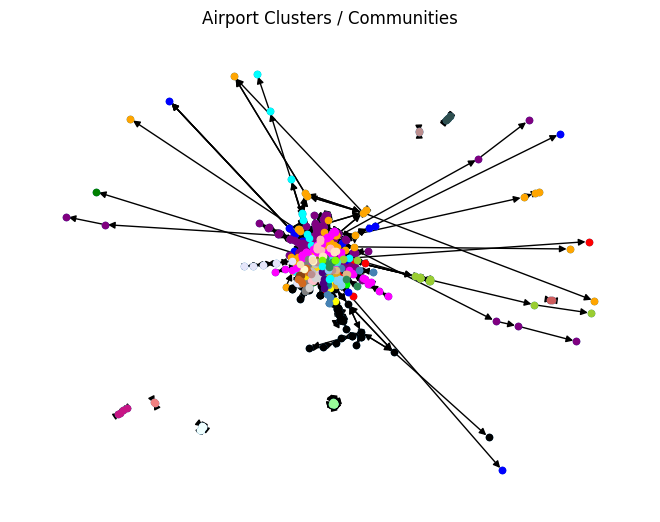

In [48]:
nx.draw(G_a, pos, node_size=20)
for i in range(len(greedy)):
    nx.draw_networkx_nodes(greedy[i], pos, node_color=colors[i], node_size=20)
plt.title("Airport Clusters / Communities")
plt.show()

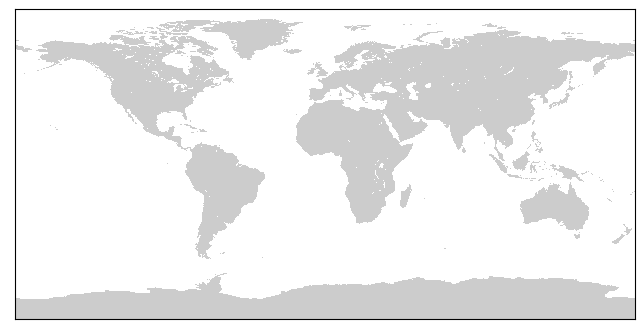

In [59]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.drawlsmask()